In [1]:
# Set environment

%matplotlib inline

import glob
import numpy as np
from scipy.io import loadmat, savemat
from fooof import FOOOF
from fooof.utils.download import load_fooof_data
import matplotlib.pyplot as plt
import os 
from os.path import dirname, join as pjoin
from pathlib import Path
import shutil

/home/ttha0011/kg98/Thapa/GWM/RESTDATAonly/3_AnalysedEEGdata/2To40Hz_Knee/001
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     1.4669, 20.5071, 1.7147                                      
                                                                                                  
                               

/usr/local/fooof/1.0.0/fooof-1.0.0-venv/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                      0.8254, 1.2510, 1.1813                                      
                                                                                                  
                                       3 peaks were found:                                        
          

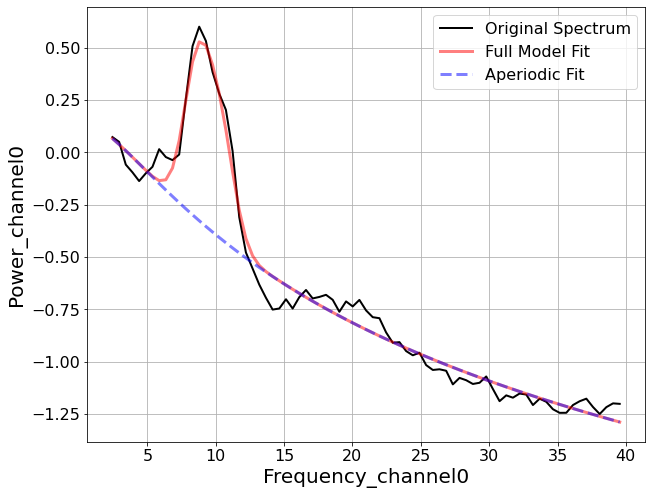

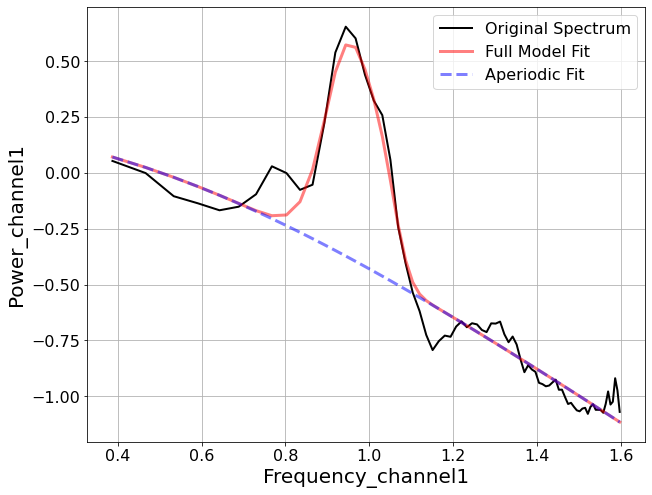

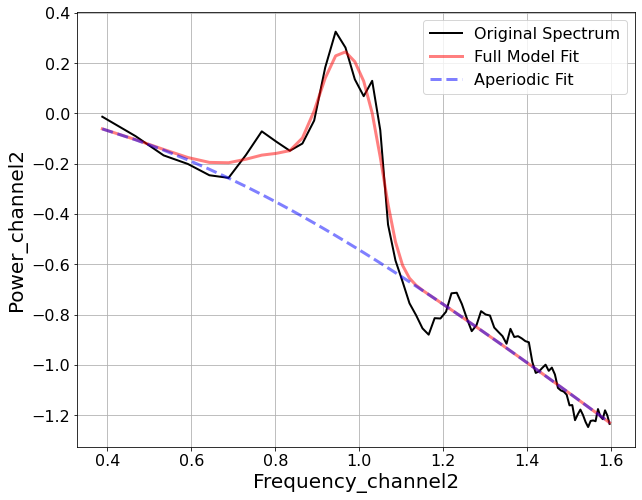

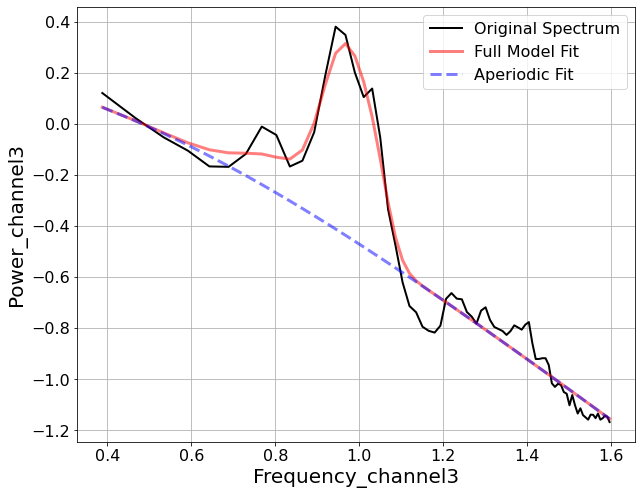

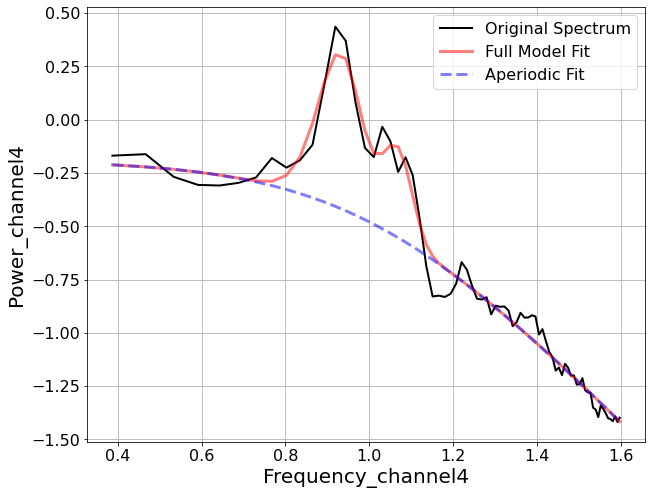

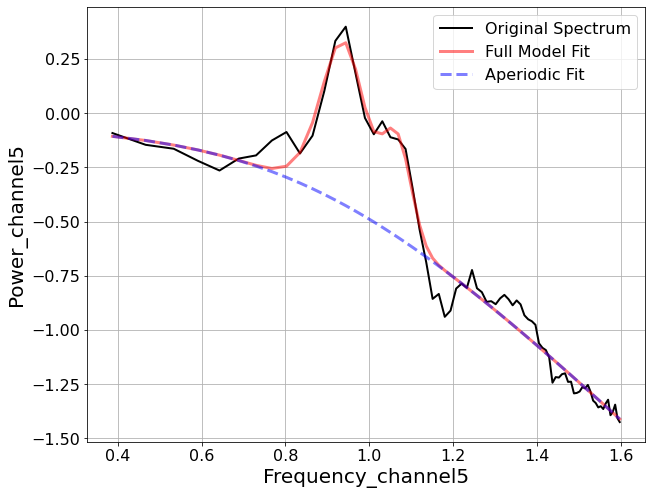

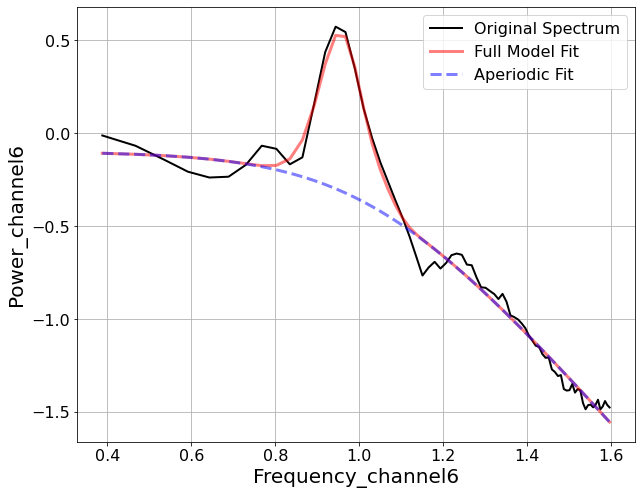

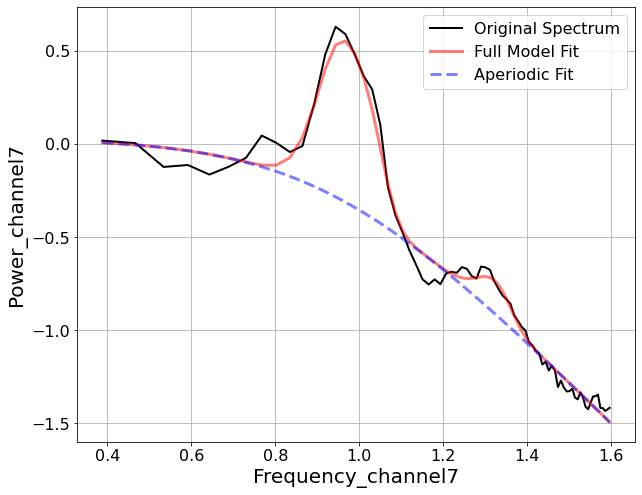

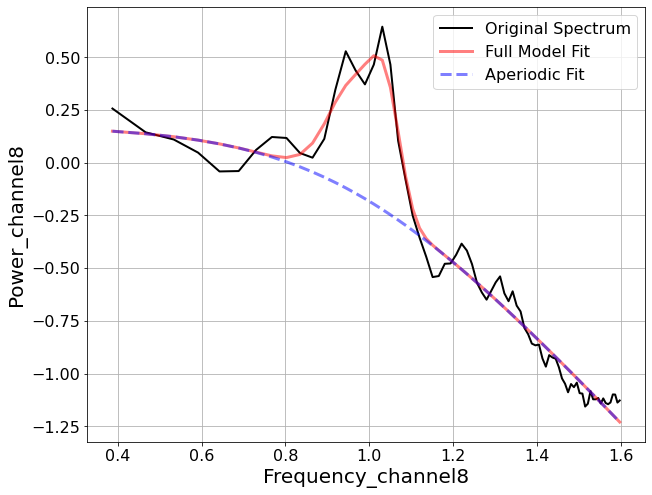

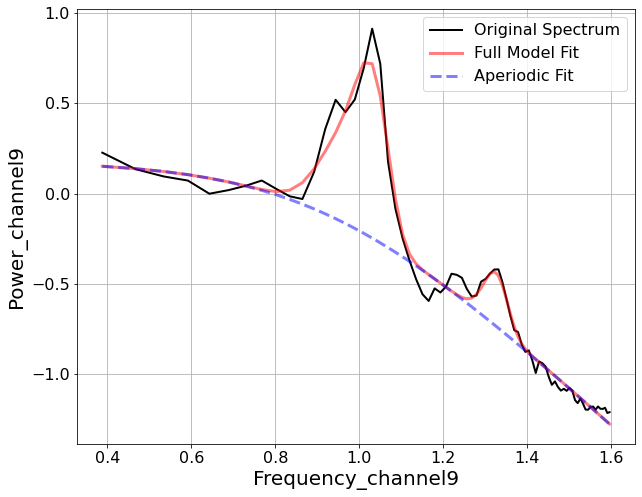

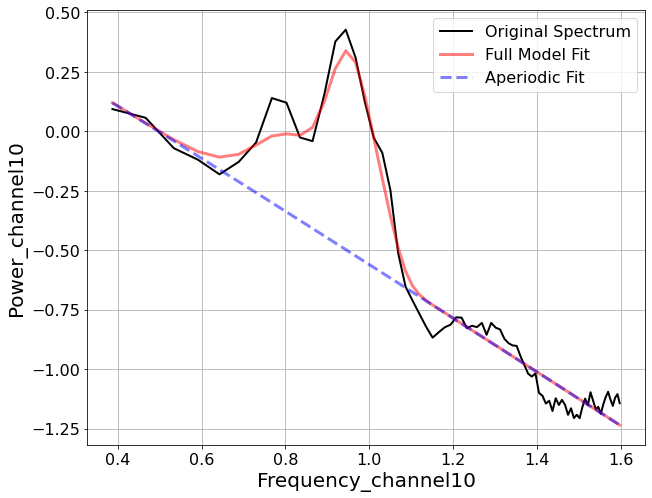

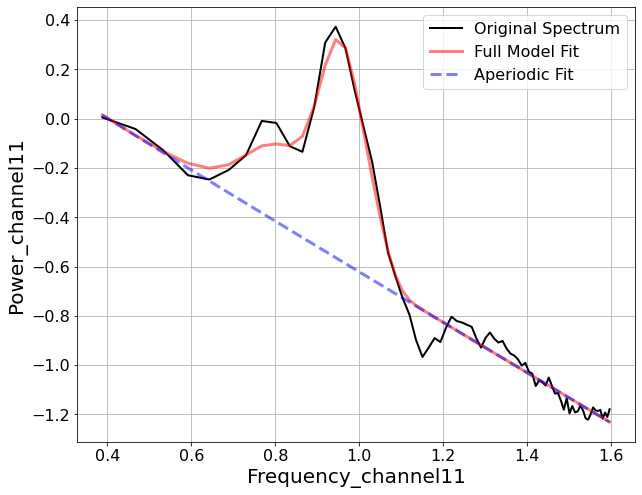

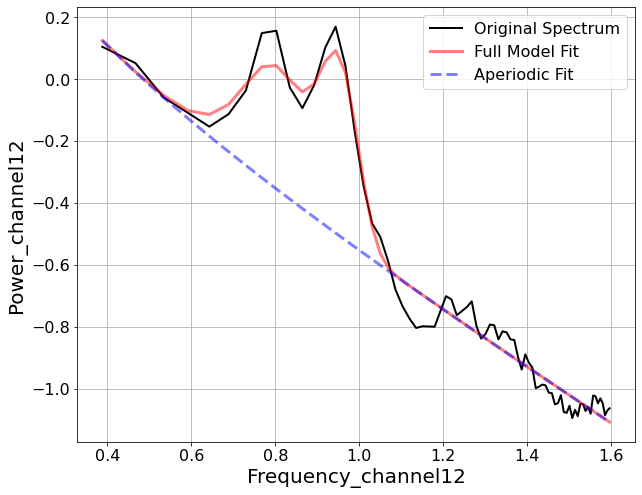

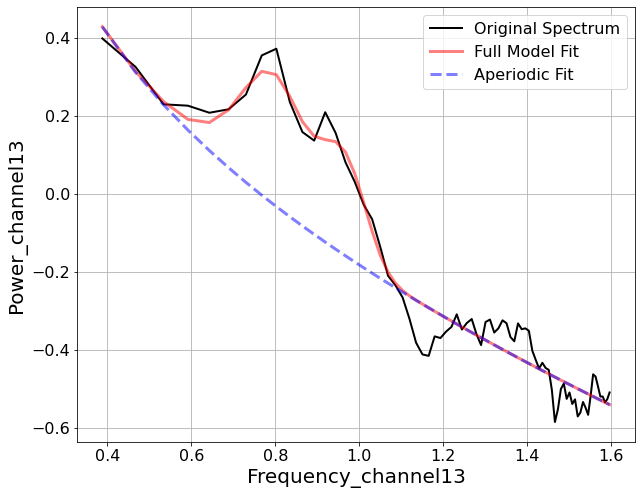

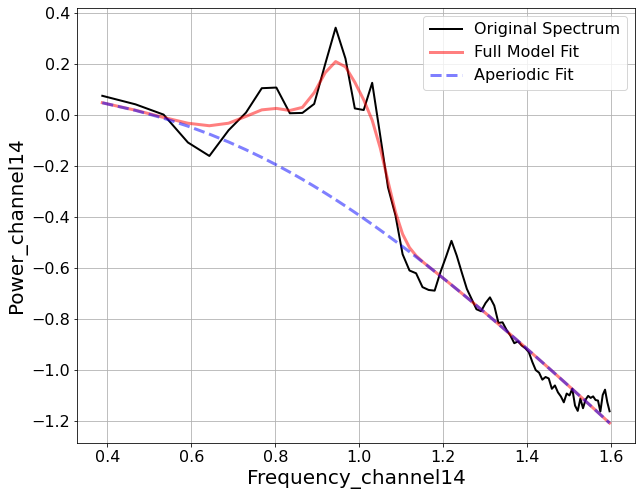

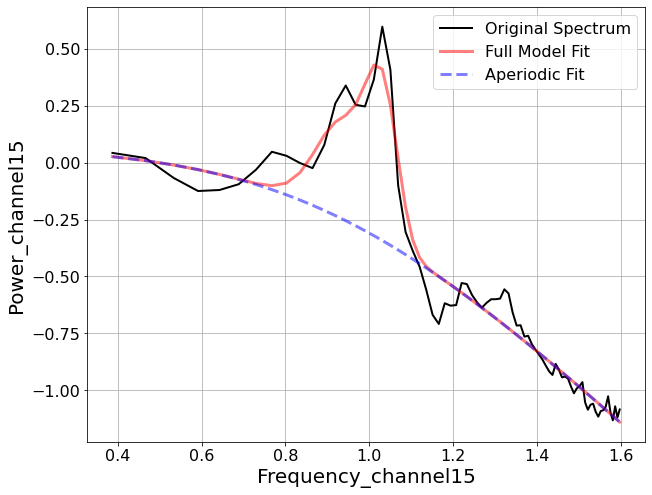

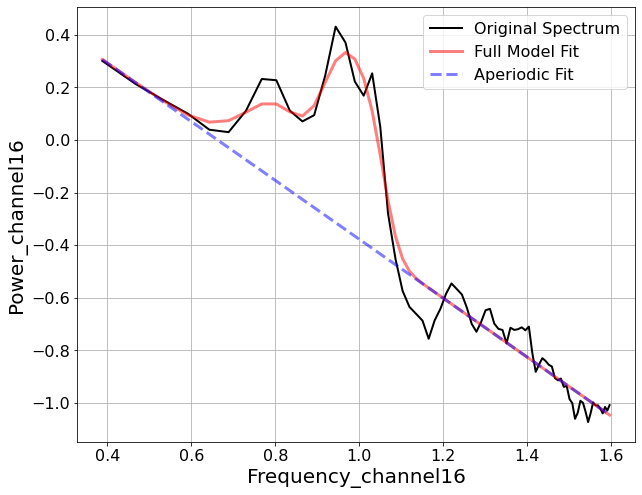

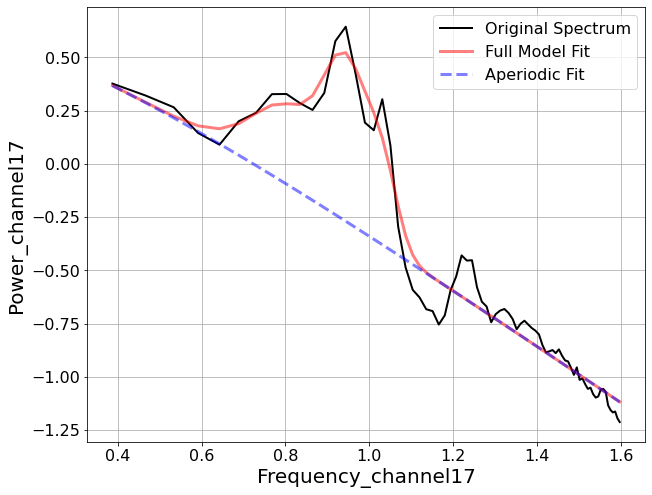

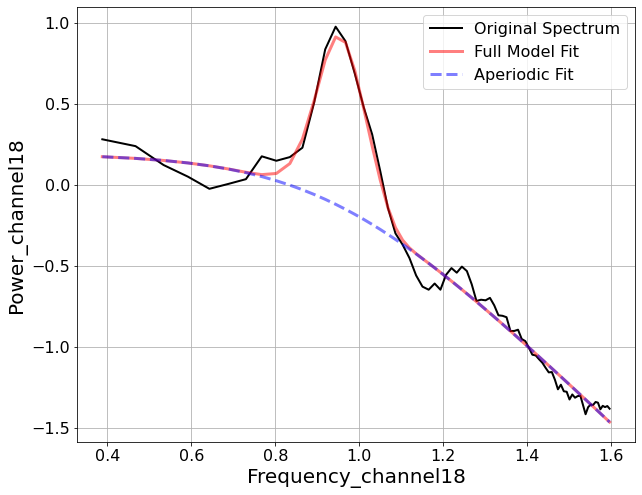

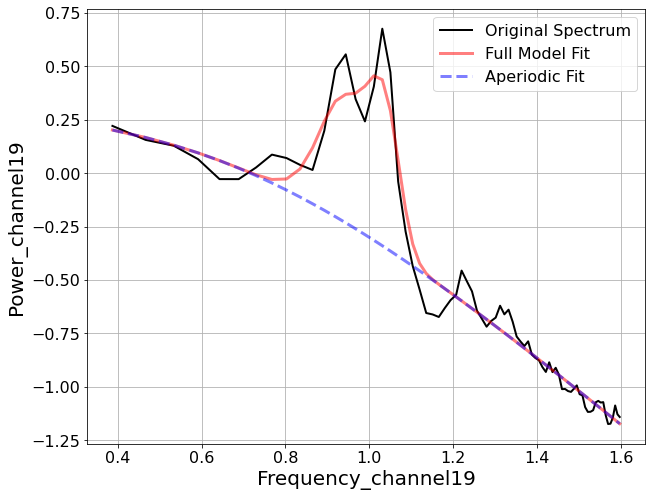

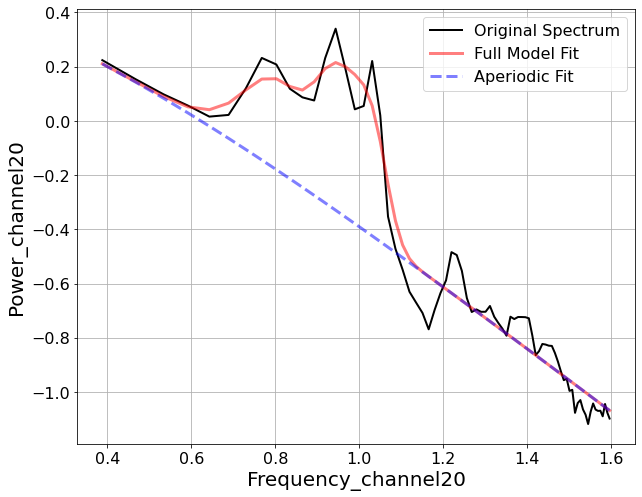

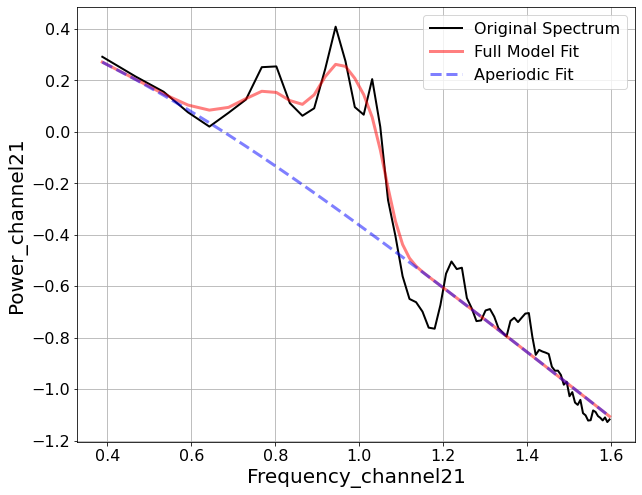

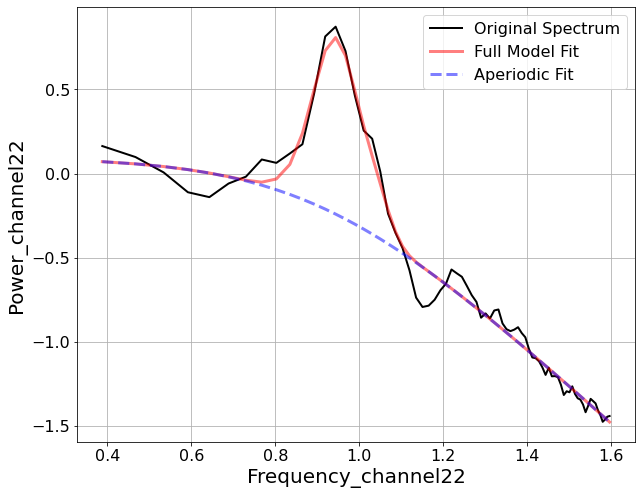

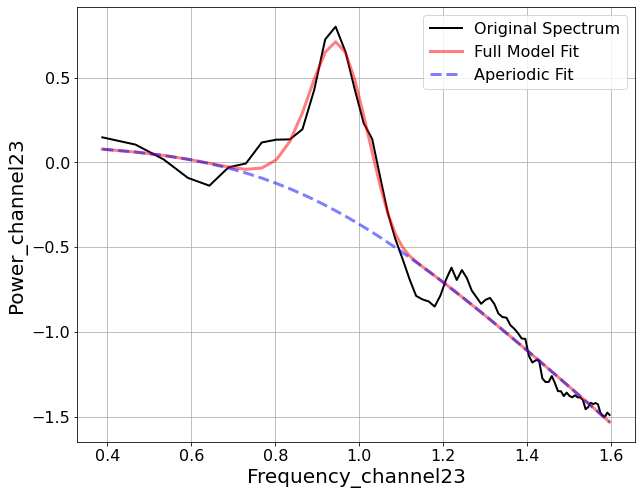

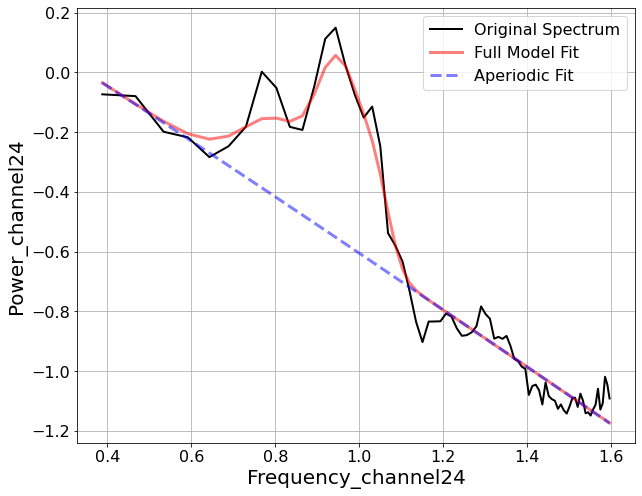

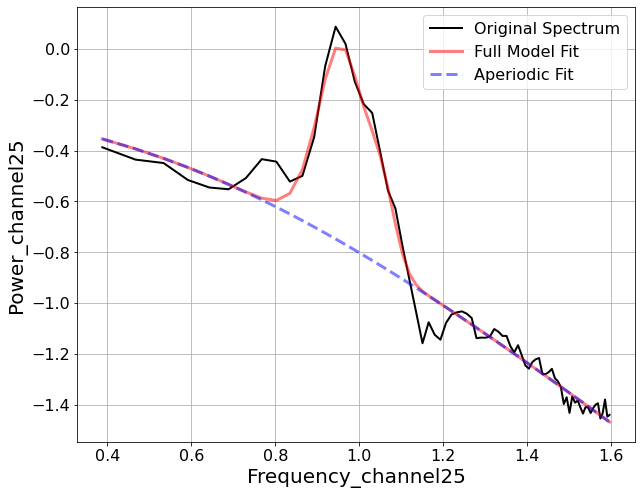

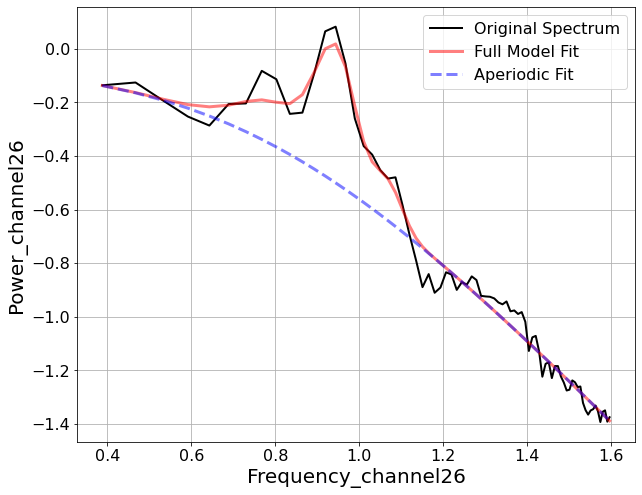

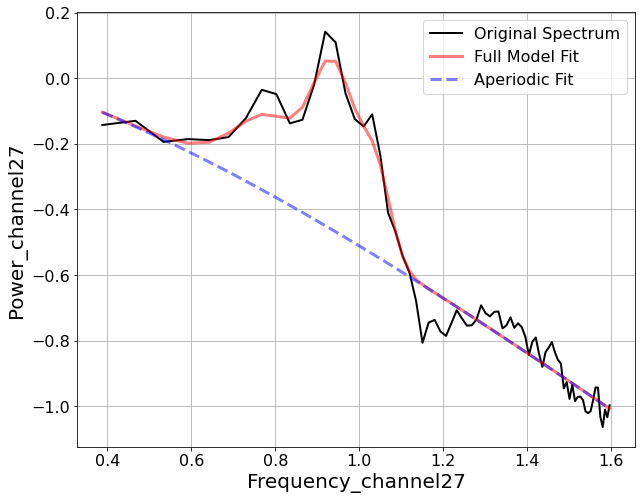

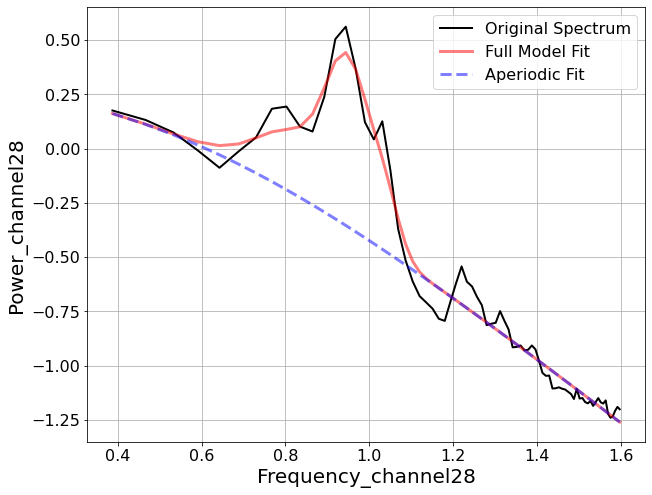

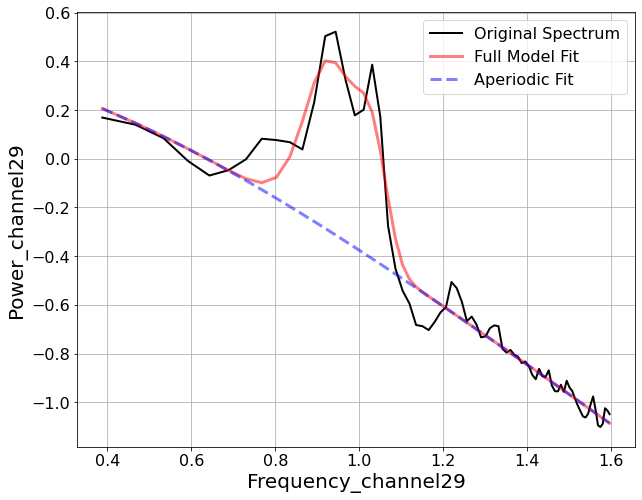

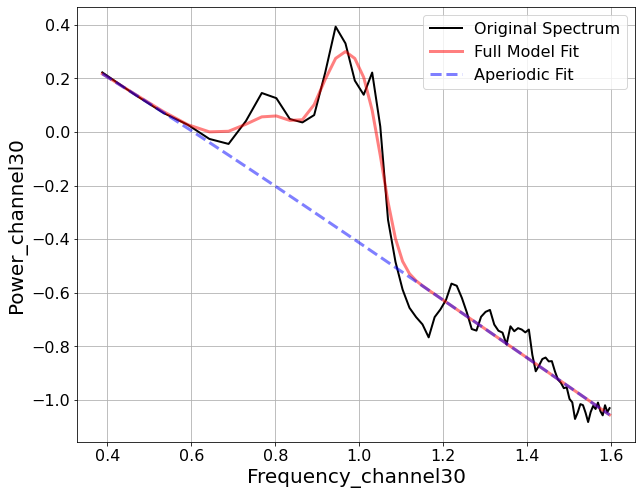

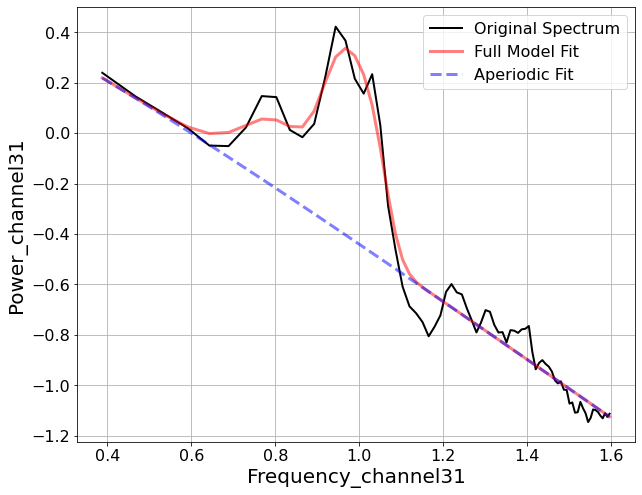

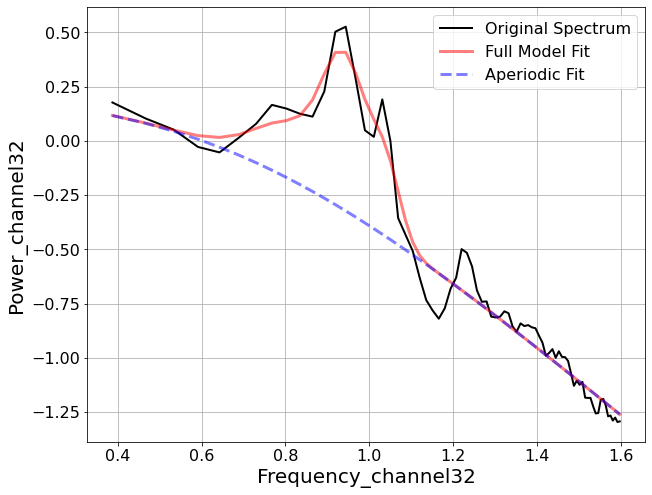

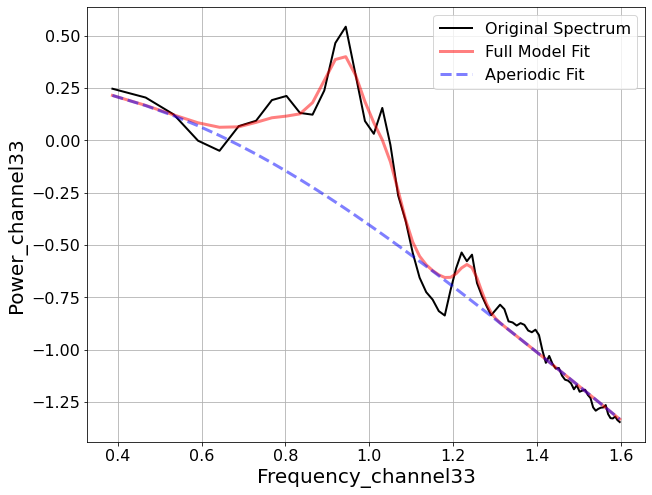

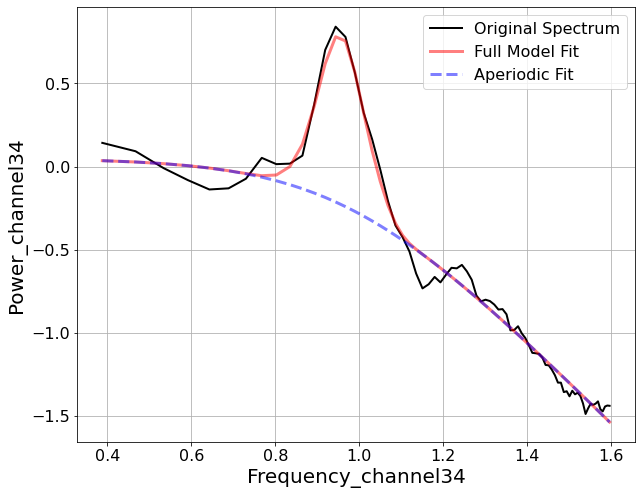

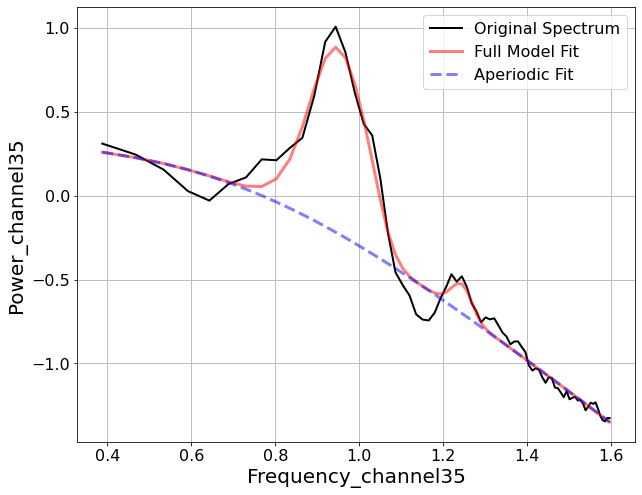

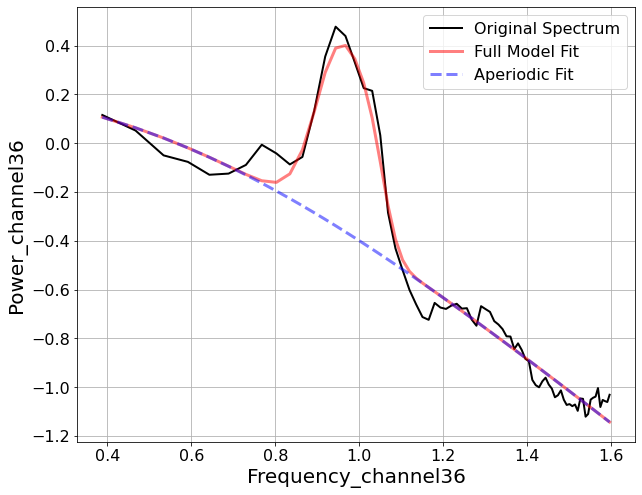

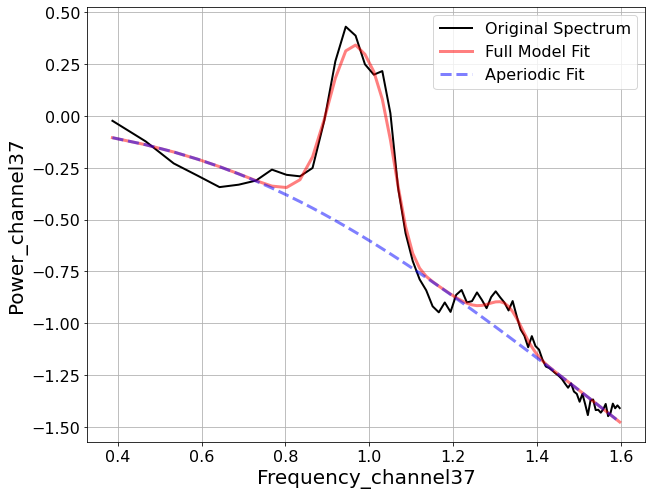

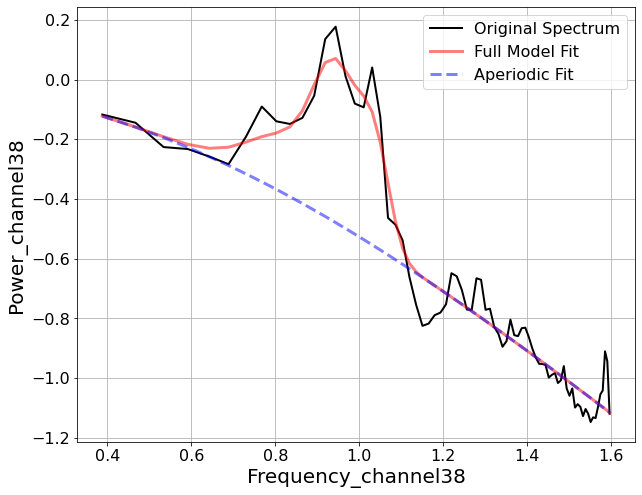

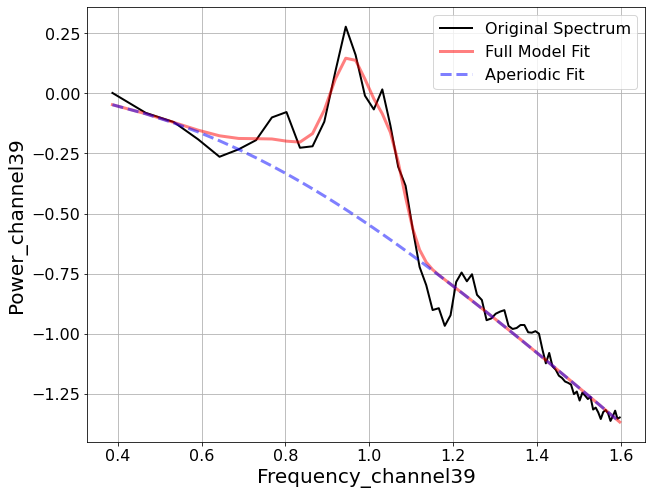

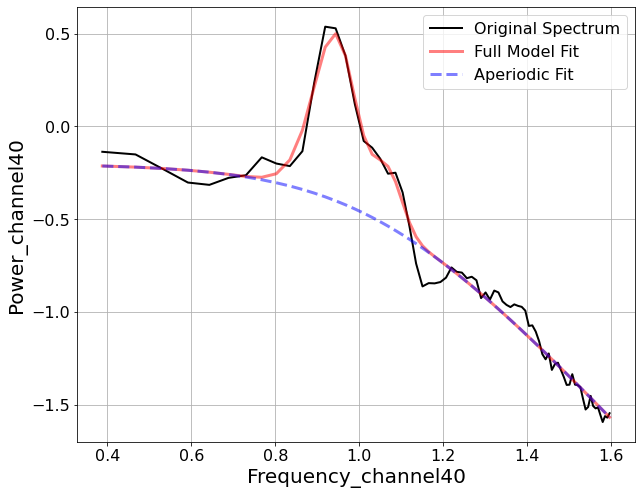

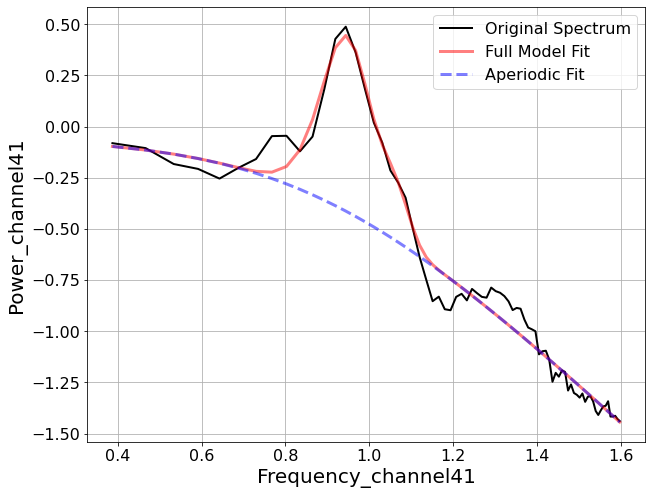

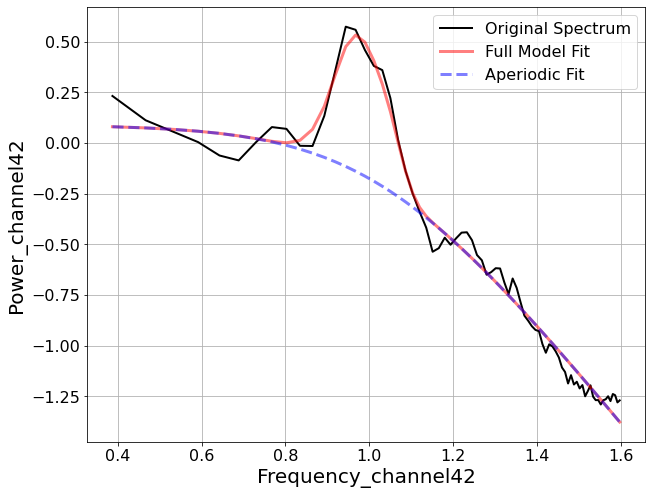

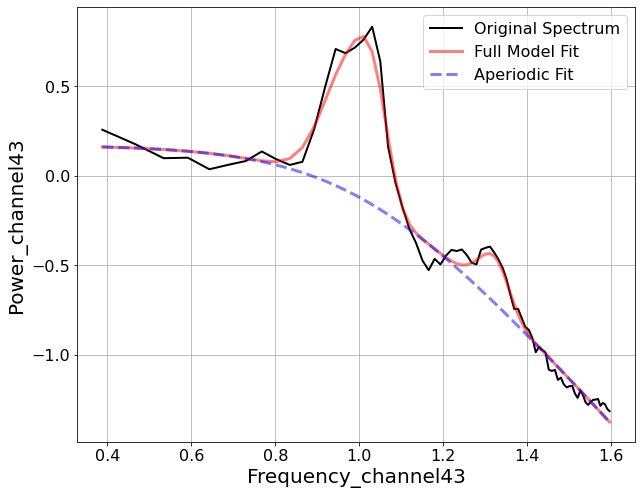

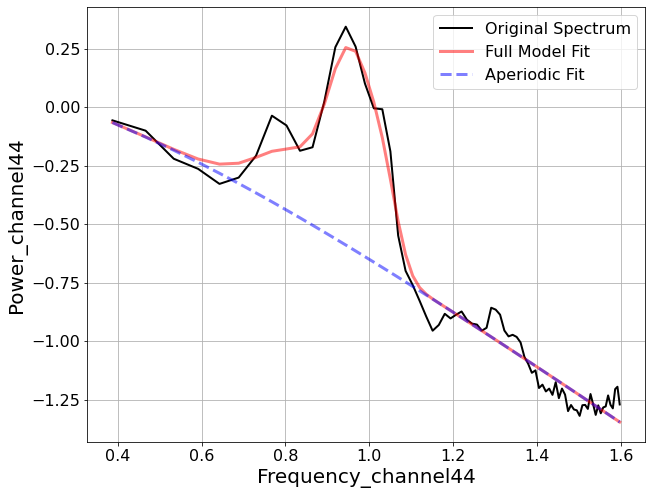

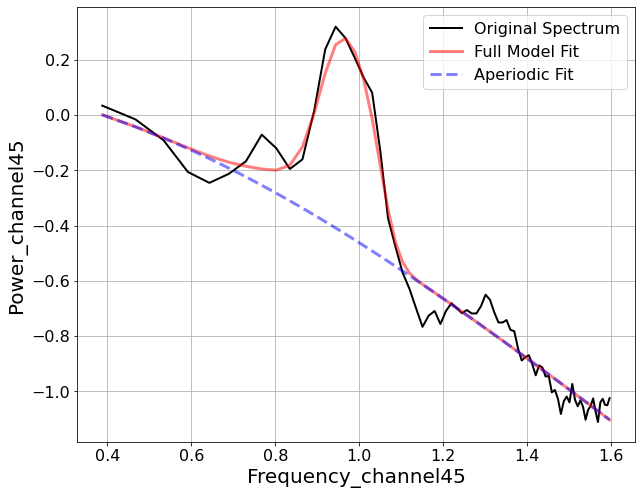

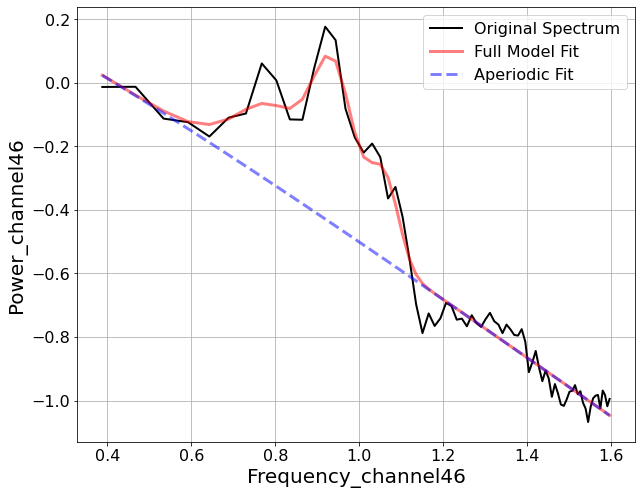

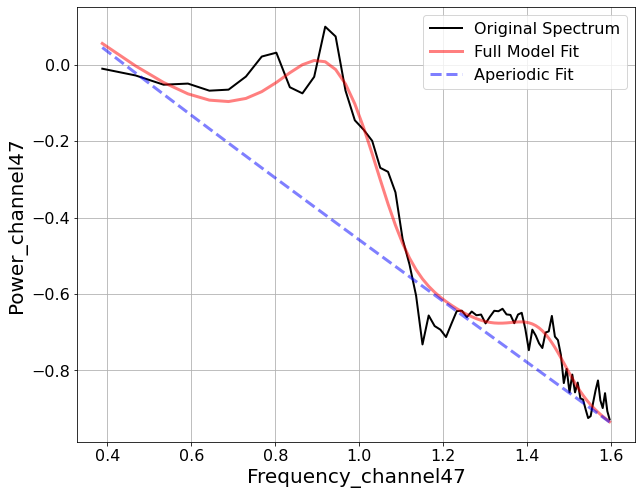

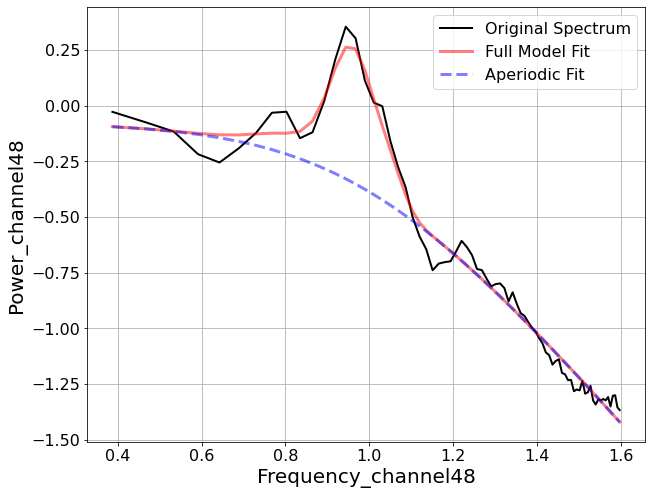

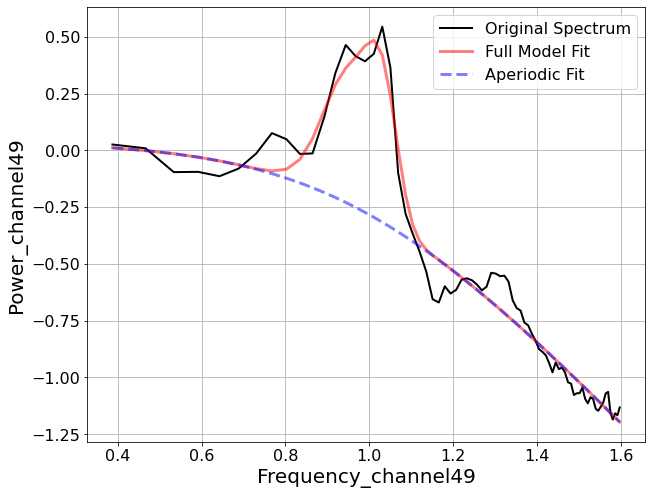

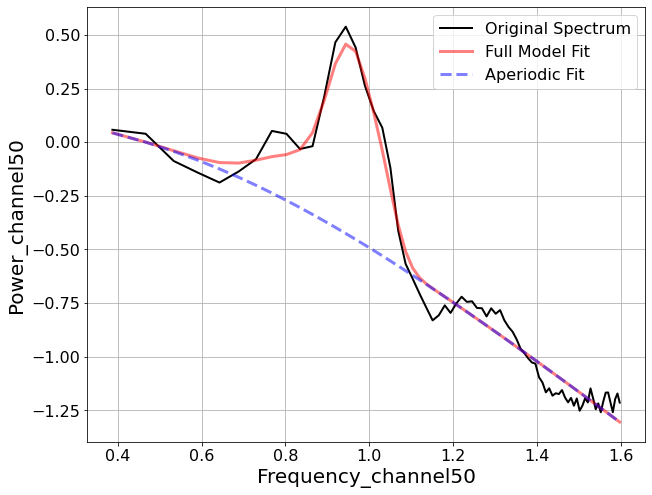

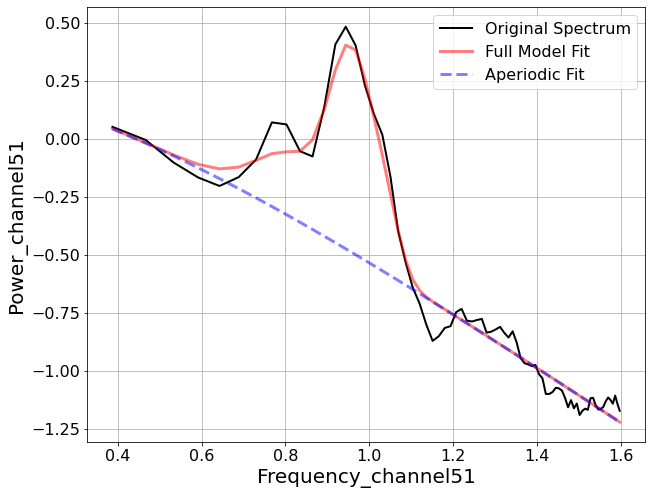

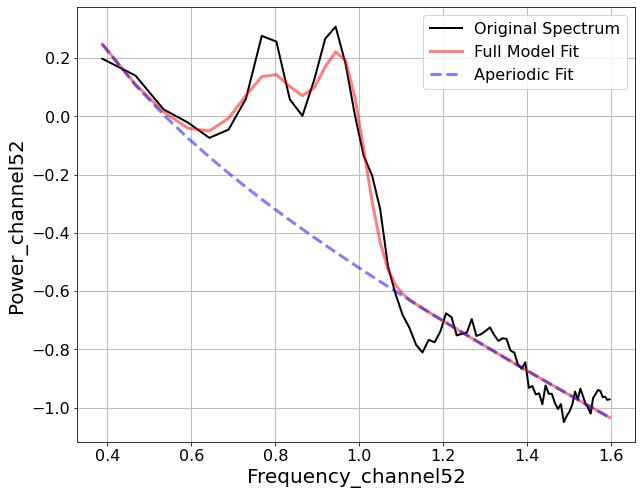

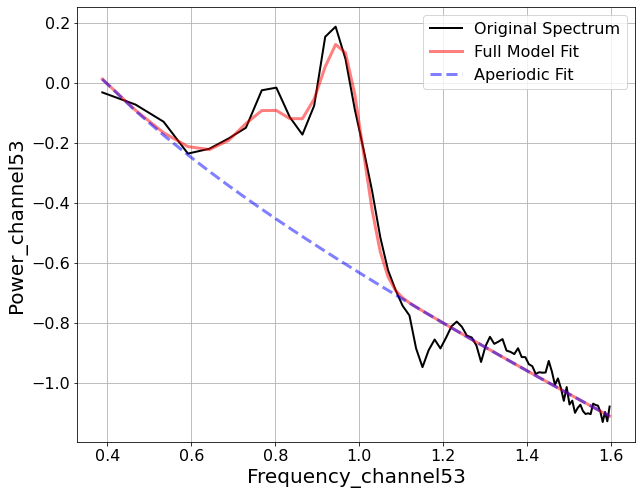

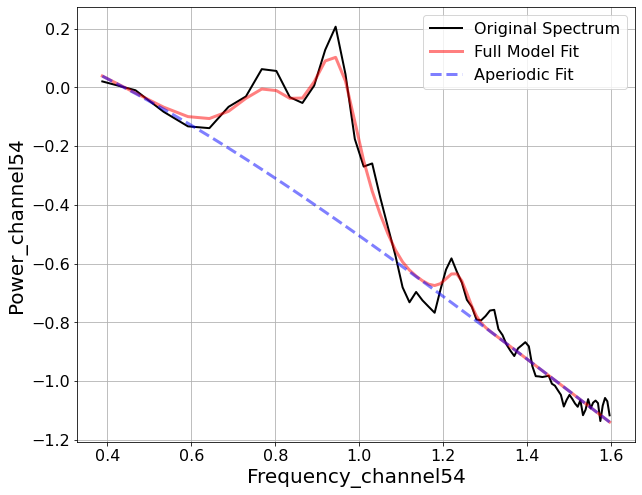

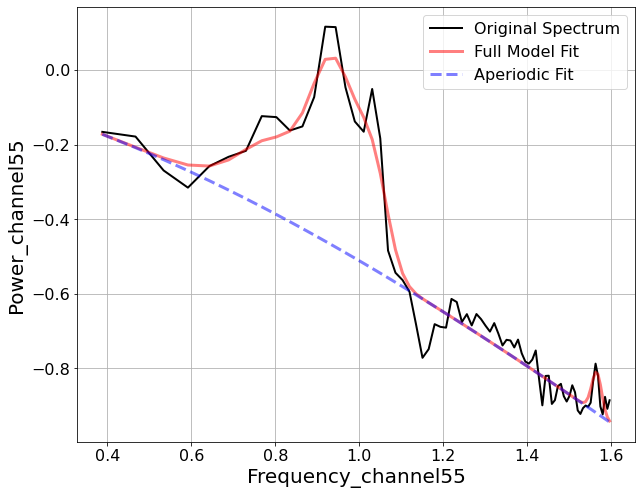

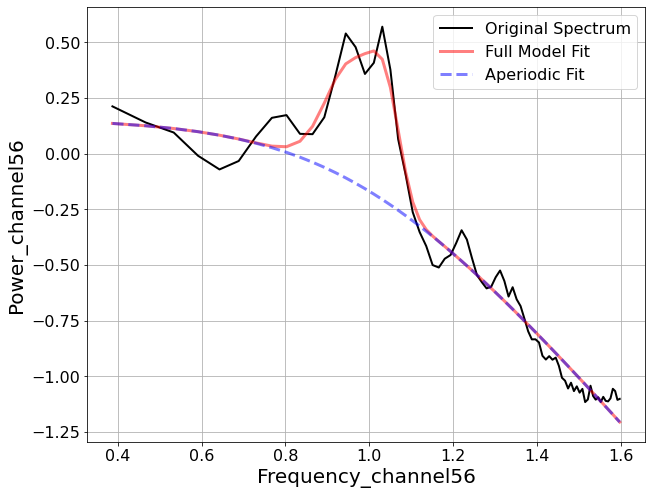

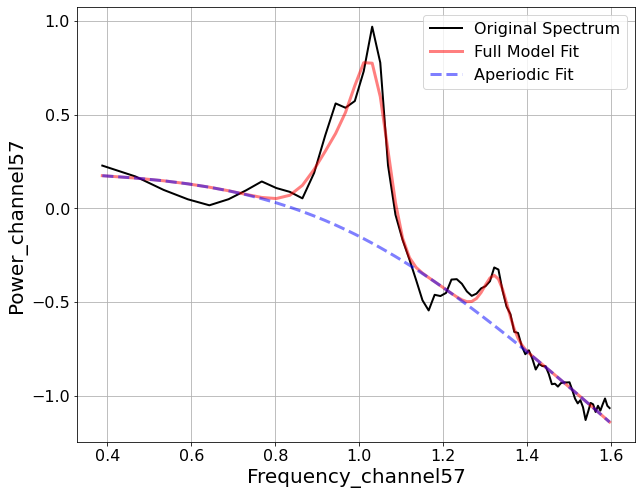

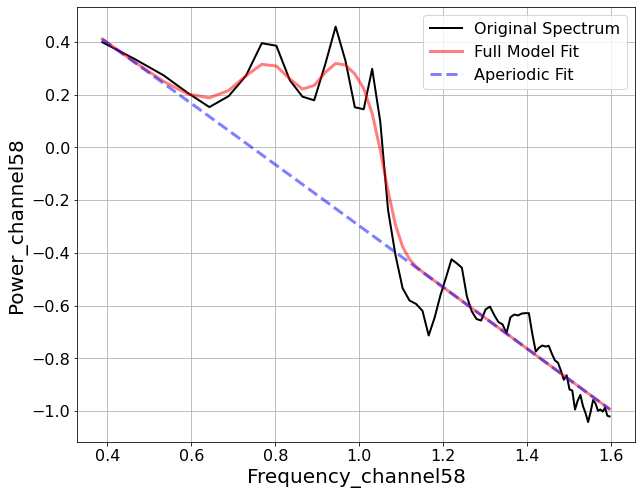

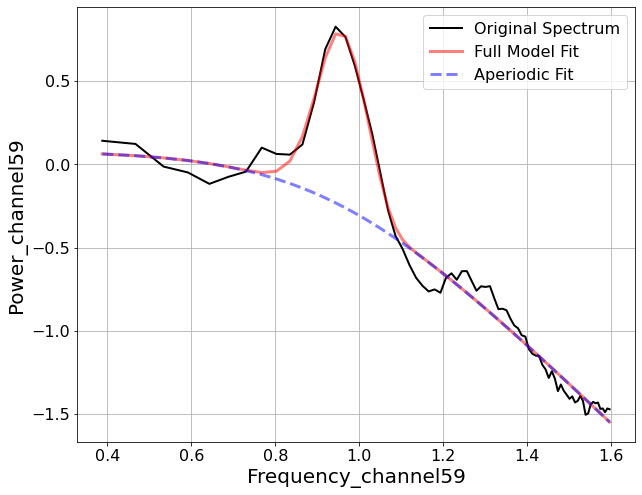

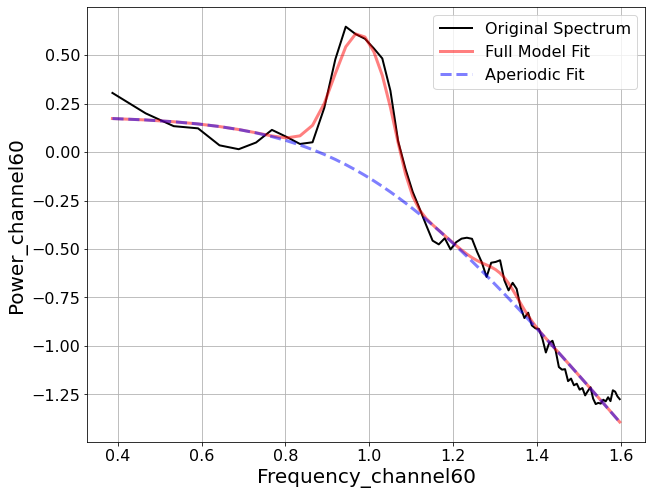

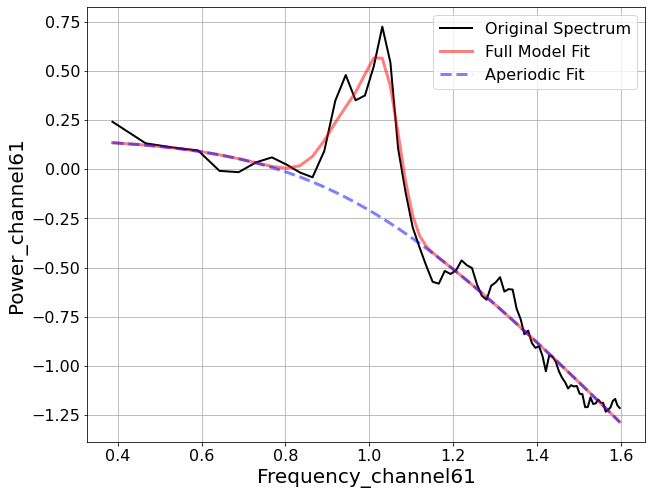

In [2]:
# Set paths

#IDs = ['001', '005', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '061', '063', '064', '065', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139']

IDs = ['001']

for SubjID in IDs:

    # Step 1: Set path to subject directory
    data_folder = Path("/home/ttha0011/kg98/Thapa/GWM/RESTDATAonly/3_AnalysedEEGdata/2To40Hz_Knee/")

    # Step 2: Define path by combining Step 1, and 2
    file_to_open = data_folder / SubjID
    print(file_to_open)
    # Step 3: Change directory to the path defined in Step 3
    os.chdir(file_to_open)
    
    # Step 4: Create a dictionary to read the file
    exp = dict ()

    # Step 5: Read in the .mat file
    exp['filelist'] = glob.glob ('*.mat')

    # Step 6: Load .mat file
    exp['subjData'] = loadmat(exp['filelist'] [0])

    # Step 7: Arrange data to the way FOOOF wants it, and define channels
    channels = np.arange(0, np.shape(exp['subjData']['freqs'])[1])

    channels
    
    # Step 8: Run FOOOF    
    for n in channels:

        # Step 1: Load FOOOF
        #fm = FOOOF() 
        fm = FOOOF(peak_width_limits=[2, 8], aperiodic_mode='knee')

        # Step 2: Set frequency range
        freq_range = [2, 40]

        # Step 3: Run FOOOF
        fm.report(exp['subjData']['freqs'][:, n], exp['subjData']['psds'][:, n], freq_range, n) 

        # Step 4: Extract FOOOF results from Step 3
        fooof_results = fm.get_results()

        # Step 5: Convert FOOOF results to a dictionary to save the output as a .mat file
        fooof_results_dict = fooof_results._asdict()

        # Step 6: Save FOOOF output for every channel as a .mat file
        filename=('fooof_results'+str(n)+'.mat')
        savemat(filename, fooof_results_dict)   
        
        # Step 7: Save FOOOF plots to demonstrate fit
        plt.xlabel('Frequency_channel'+str(n))
        plt.ylabel('Power_channel'+str(n))
        plt.savefig('fooof_results'+str(n)+'.png') 

In [38]:
#These cells creates a FOOOF_outputs folder, and moves fooof_results to this folder

IDs = ['012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '061', '063', '064', '065', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139']

#IDs = ['001', '005', '007', '008', '009', '010', '011']

for SubjID in IDs:

    # Step 1: Set path to subject directory
    data_folder = Path("/home/ttha0011/kg98/Thapa/GWM/RESTDATAonly/3_AnalysedEEGdata/2To40Hz_Knee/")
    
    #Step 2: Join paths to 'FOOOF_results' folder
    FOOOF_output = os.path.join(data_folder, SubjID, 'FOOOF_results')
    
    #Step 3: Join paths to 'FOOOF_results' folder
    Subj_dir = os.path.join(data_folder, SubjID,)
    
    os.chdir(Subj_dir)
    
    shutil.rmtree('FOOOF_results')
    
    #Step 3: Name the 'FOOOF_results' folder
    dir_name = 'FOOOF_results'
           
    #Step 4: Make the directory where you will put fooof_results
    os.mkdir(FOOOF_output)
    
    #Step 5: Define source folder for fooof_results
    source_folder = os.path.join(data_folder, SubjID)

    #Step 6: Define destination folder where you want to move fooof_results to
    destination_folder = os.path.join(data_folder, SubjID, 'FOOOF_results')
     
    #Step 7: Change directory to source_folder
    os.chdir(source_folder)
    
    #Step 8: Define the .mat files from FOOOF that you want to move to the FOOOF_results folder
    files = glob.glob("fooof_results*.mat")    
    
    #Step 9: Move FOOOF_results to FOOOF_output folder
    for f in files:
         src = source_folder
         dst = destination_folder
         shutil.move(f,dst)
            
    
    #Step 10: Define the .mat files from FOOOF that you want to move to the FOOOF_results folder
    files = glob.glob("fooof_results*.png")    
    
    #Step 11: Move FOOOF_results to FOOOF_output folder
    for f in files:
         src = source_folder
         dst = destination_folder
         shutil.move(f,dst)